In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
crypto = pd.read_csv('Cryptocurrency Prices by Date.csv')
crypto.head()

,Currency,Date,Price
0,0x,1502892561000,0.111725
1,0x,1502982305000,0.211486
2,0x,1503068692000,0.283789
3,0x,1503155108000,0.511434
4,0x,1503241503000,0.429522


In [3]:
print(f'The dataset has a shape of {crypto.shape}', '\n')
print(f'The dataset has {crypto.isnull().sum().sum()} missing values', '\n')
print(f'The dataset has {crypto.duplicated().sum()} duplicated rows', '\n')

The dataset has a shape of (657316, 3) 

The dataset has 0 missing values 

The dataset has 0 duplicated rows 



In [4]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657316 entries, 0 to 657315
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Currency  657316 non-null  object 
 1   Date      657316 non-null  int64  
 2   Price     657316 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.0+ MB


# EDA

In [5]:
# Show full output
pd.set_option('display.max_rows', None)
# Number of cryptocurrencies
crypto['Currency'].value_counts().sort_values(ascending=False)


Currency
namecoin                                1736
litecoin                                1735
bitcoin                                 1733
feathercoin                             1727
novacoin                                1727
peercoin                                1726
terracoin                               1702
bitbar                                  1692
worldcoin                               1686
digitalcoin                             1679
goldcoin                                1661
primecoin                               1661
megacoin                                1654
ripple                                  1633
yacoin                                  1624
anoncoin                                1621
ixcoin                                  1611
infinitecoin                            1610
quark                                   1606
zetacoin                                1594
cryptogenic-bullion                     1591
freicoin                                1584
p

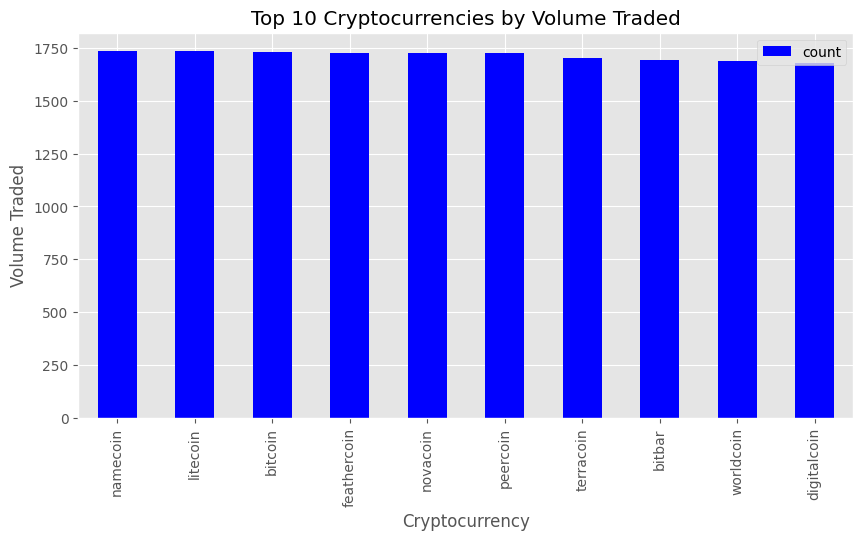

In [6]:
# Top 10 cryptocurrencies
plt.style.use('ggplot')
crypto['Currency'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='blue',
                                                                             figsize=(10, 5), title='Top 10 Cryptocurrencies by Volume Traded')
plt.legend()
plt.xlabel('Cryptocurrency')
plt.ylabel('Volume Traded')
plt.show();

In [7]:
# Date column is written in this format 1502892561000 which is the number of milliseconds since 1 January 1970
# Convert the date column to datetime format
crypto['Date'] = pd.to_datetime(crypto['Date'], unit='ms')

# Obtain the year, month, day and time from the date column
crypto['month'] = crypto['Date'].dt.month
crypto['year'] = crypto['Date'].dt.year
crypto['day'] = crypto['Date'].dt.day
crypto['time'] = crypto['Date'].dt.time

# Separate time from the date column ie 2017-08-16 14:09:21 to be 2017-08-16
crypto['Date'] = crypto['Date'].apply(lambda x: str(x).split(' ')[0])

crypto.head()

,Currency,Date,Price,month,year,day,time
0,0x,2017-08-16,0.111725,8,2017,16,14:09:21
1,0x,2017-08-17,0.211486,8,2017,17,15:05:05
2,0x,2017-08-18,0.283789,8,2017,18,15:04:52
3,0x,2017-08-19,0.511434,8,2017,19,15:05:08
4,0x,2017-08-20,0.429522,8,2017,20,15:05:03


In [8]:
# Rearrange columnns
crypto = crypto[['Currency', 'Date', 'month', 'year', 'day', 'time', 'Price']]
crypto.head()

,Currency,Date,month,year,day,time,Price
0,0x,2017-08-16,8,2017,16,14:09:21,0.111725
1,0x,2017-08-17,8,2017,17,15:05:05,0.211486
2,0x,2017-08-18,8,2017,18,15:04:52,0.283789
3,0x,2017-08-19,8,2017,19,15:05:08,0.511434
4,0x,2017-08-20,8,2017,20,15:05:03,0.429522


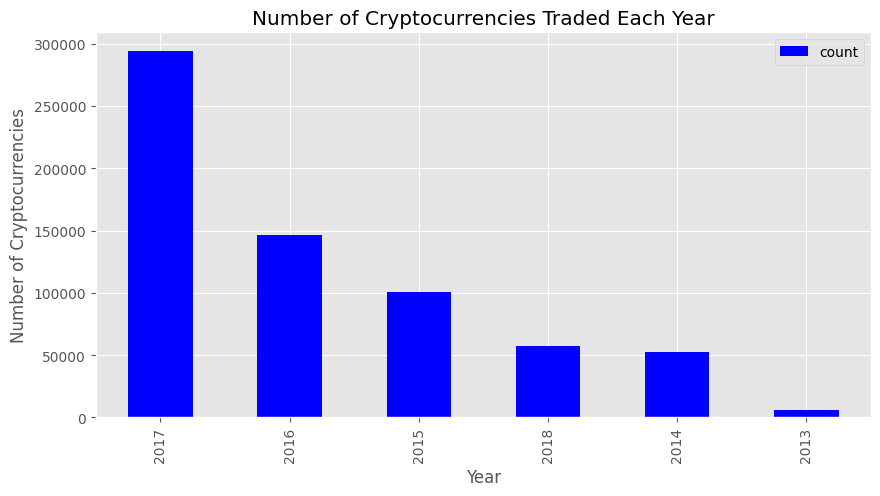

In [9]:
# Number of cryptocurrencies traded each year
crypto['year'].value_counts().sort_values(ascending=False).plot(kind='bar', color='blue', figsize=(10, 5),
                                                                title='Number of Cryptocurrencies Traded Each Year')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Cryptocurrencies')
plt.show();

<Axes: title={'center': 'Top 10 Cryptocurrencies Traded in 2017'}, xlabel='Currency'>

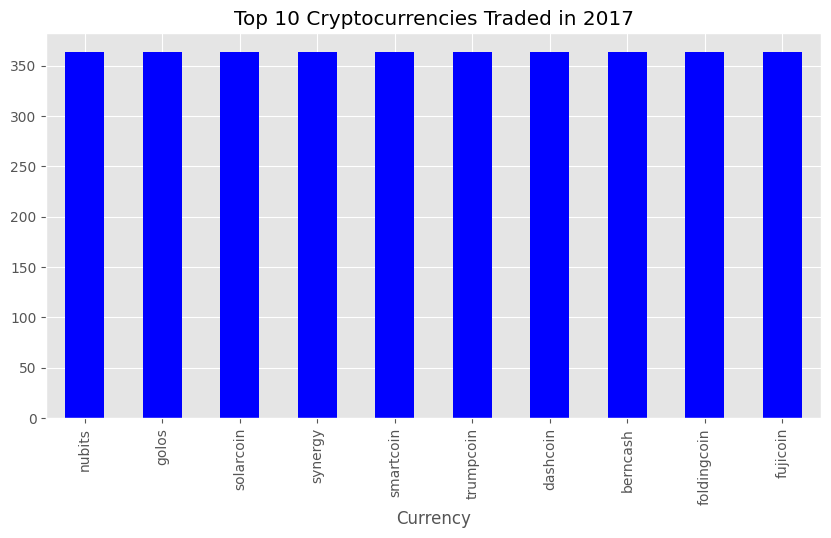

In [10]:
# 2017 cryptocurrency trade
crypto[crypto['year'] == 2017]['Currency'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='blue', figsize=(10, 5),
                                                                                                    title='Top 10 Cryptocurrencies Traded in 2017')         


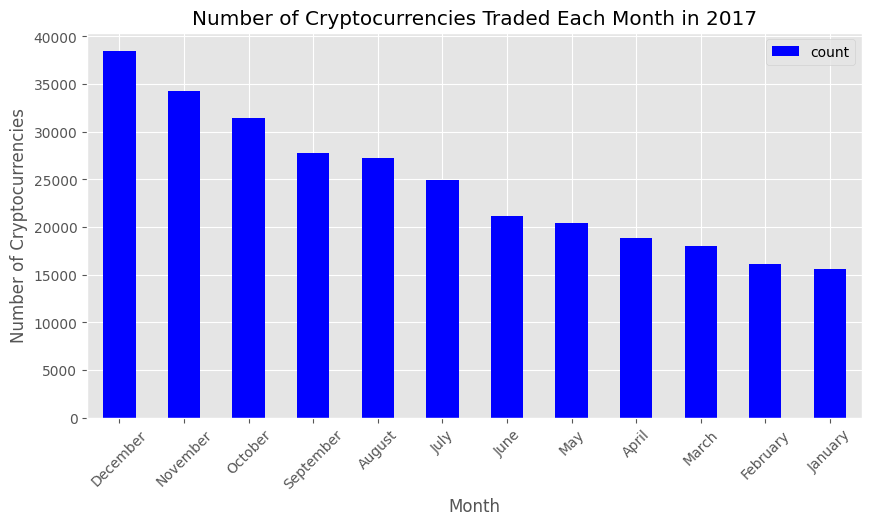

In [11]:
crypto_17 = crypto.query('year == 2017')

# Plot the number of cryptocurrencies traded each month in 2017
crypto_17['month'].value_counts().sort_values(ascending=False).plot(kind='bar', color='blue', figsize=(10, 5), title='Number of Cryptocurrencies Traded Each Month in 2017')
plt.legend()

# Replace xticks with month names in reverse order
plt.xticks(np.arange(12), ('December', 'November', 'October', 'September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January'), rotation=45)

plt.xlabel('Month')
plt.ylabel('Number of Cryptocurrencies')
plt.show();

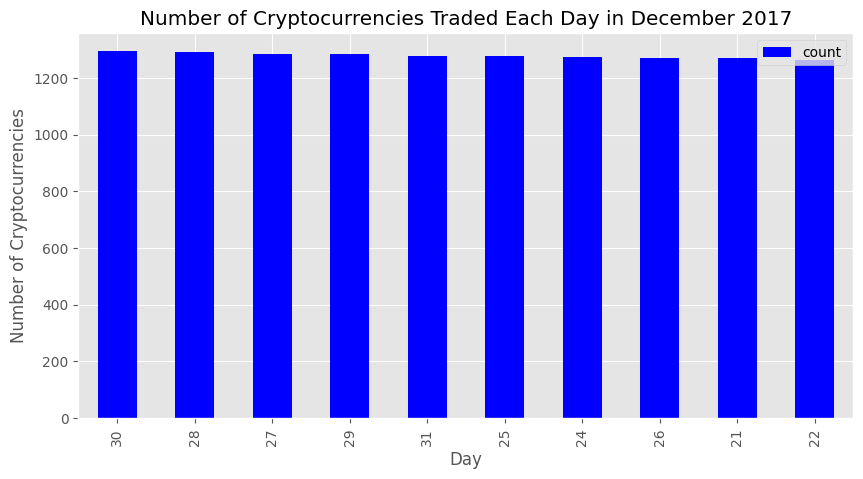

In [12]:
# Which Day in December 2017 had the most cryptocurrencies traded?
crypto_17[crypto_17['month'] == 12]['day'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='blue', figsize=(10, 5), title='Number of Cryptocurrencies Traded Each Day in December 2017')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number of Cryptocurrencies')
plt.show();

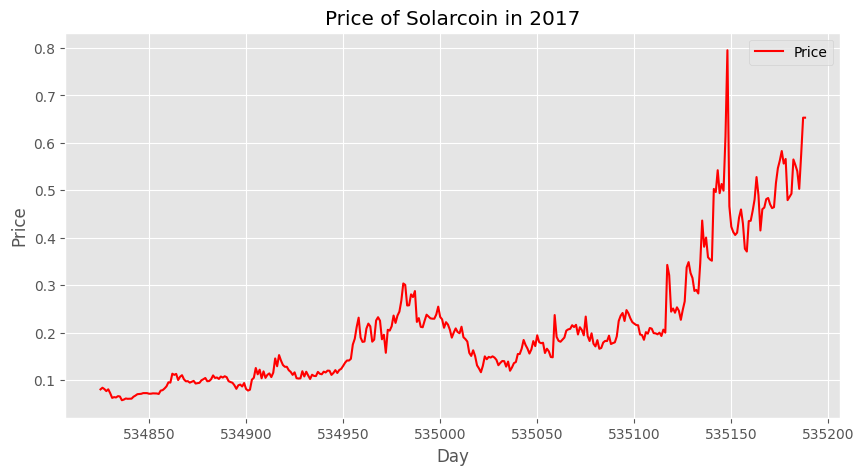

In [13]:
# Price of Solarcoin in 2017
crypto_17[crypto_17['Currency'] == 'solarcoin']['Price'].plot(kind='line', color='r', figsize=(10, 5), title='Price of Solarcoin in 2017')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.show();

<Axes: title={'center': 'Price v Date Total'}, xlabel='Date'>

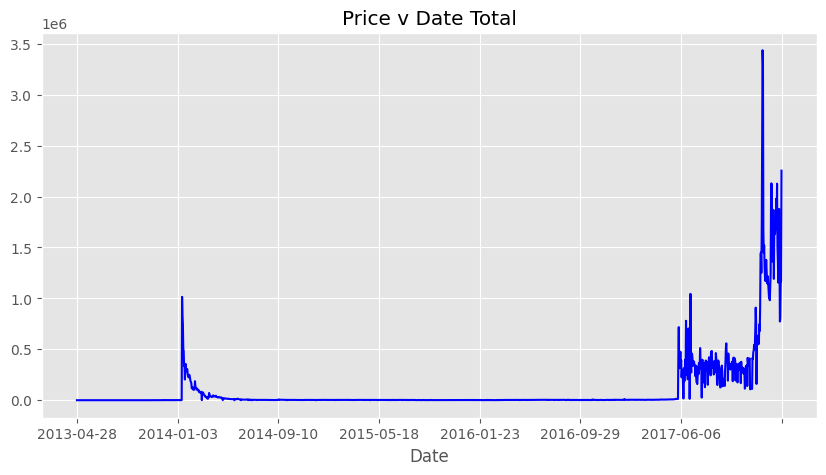

In [14]:
# Price v date total
crypto.groupby('Date')['Price'].sum().plot(kind='line', color='b', figsize=(10, 5), title='Price v Date Total')

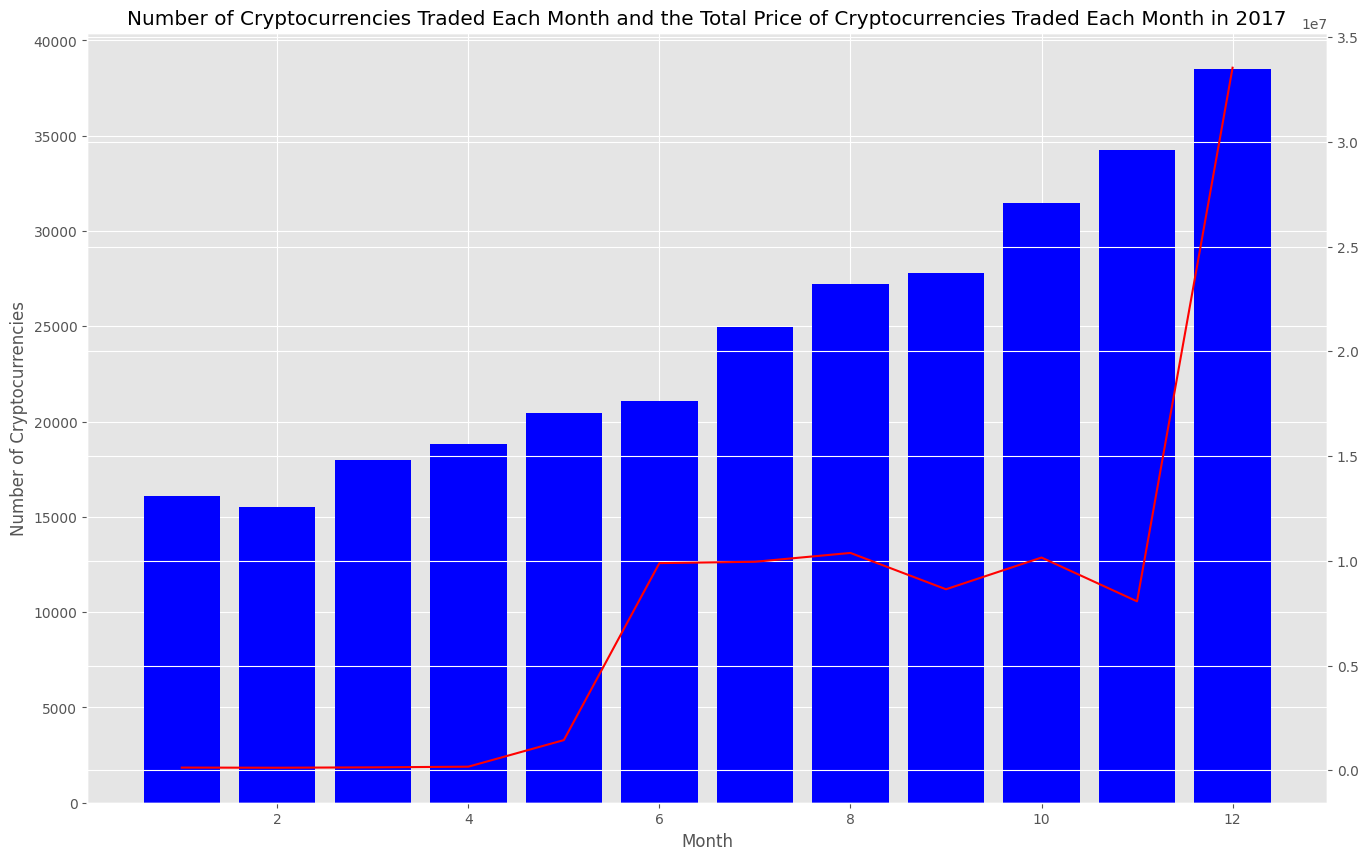

In [15]:
# A combo of a bar and line plot to show the number of cryptocurrencies traded each month in 2017 and the total price of cryptocurrencies traded each month in 2017
fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()
ax1.bar(crypto_17['month'].value_counts().sort_values(ascending=False).index, crypto_17['month'].value_counts().sort_values(ascending=False).values, color='b')
ax2.plot(crypto_17.groupby('month')['Price'].sum(), color='r')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Cryptocurrencies')
ax1.set_xlabel('Month')
#ax2.set_ylabel('Total Price')
plt.title('Number of Cryptocurrencies Traded Each Month and the Total Price of Cryptocurrencies Traded Each Month in 2017');

In [16]:
f, ax = plt.subplots(figsize=(10, 10))

# Plot the barplot
ax1 = crypto['Date'].sum().sort_values(ascending=False).plot(kind='bar', color='r')
ax1.set_ylabel('Total Price of Cryptocurrencies Traded Each Month')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the lineplot
ax2.plot(crypto['Price'], color='b')
ax2.set_ylabel('Price')

plt.title('Total Price of Cryptocurrencies Traded Each Month')
plt.xlabel('Month')
plt.show();

In [ ]:
# Plot the correlation heatmap
sns.heatmap(crypto.corr(), annot=True, cmap='terrain', linewidths=0.2)